# Jabar Waspada Stunting EDA 

## Data: Sanitasi

## Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

## Importing Dataset

### Data Sanitasi

In [2]:
#loading the downloaded csv
sanitasi = pd.read_csv('/work/sanitasi/dinkes-od_17398_persentase_keluarga_dengan_akses_sanitasi_layak_jamban_data.csv')
sanitasi.head()

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,persentase_sanitasi_layak,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,6.85,PERSEN,2014
1,2,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,47.29,PERSEN,2014
2,3,32,JAWA BARAT,3203,KABUPATEN CIANJUR,38.96,PERSEN,2014
3,4,32,JAWA BARAT,3204,KABUPATEN BANDUNG,57.97,PERSEN,2014
4,5,32,JAWA BARAT,3205,KABUPATEN GARUT,58.15,PERSEN,2014


In [3]:
#checking the null/ nan data
sanitasi.isnull().sum()

id                           0
kode_provinsi                0
nama_provinsi                0
kode_kabupaten_kota          0
nama_kabupaten_kota          0
persentase_sanitasi_layak    0
satuan                       0
tahun                        0
dtype: int64

In [4]:
#consistent with isnull, count is all the same for all features
sanitasi.describe()

,id,kode_provinsi,kode_kabupaten_kota,persentase_sanitasi_layak,tahun
count,189.000000,189.0,189.000000,189.000000,189.000000
mean,95.000000,32.0,3231.333333,69.979048,2017.000000
std,54.703748,0.0,31.284725,20.686456,2.005312
min,1.000000,32.0,3201.000000,0.000000,2014.000000
25%,48.000000,32.0,3207.000000,59.460000,2015.000000
50%,95.000000,32.0,3214.000000,71.380000,2017.000000
75%,142.000000,32.0,3273.000000,82.440000,2019.000000
max,189.000000,32.0,3279.000000,173.000000,2020.000000


## Observation

- no null data/ nan data

- several columns like id, kode_provinsi, nama_provinsi , satuan can be dropped

- need to chop data above 100% 

- 'KABUPATEN' string can be removed from the nama_kabupaten_kota 

In [5]:
sanitasi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         189 non-null    int64  
 1   kode_provinsi              189 non-null    int64  
 2   nama_provinsi              189 non-null    object 
 3   kode_kabupaten_kota        189 non-null    int64  
 4   nama_kabupaten_kota        189 non-null    object 
 5   persentase_sanitasi_layak  189 non-null    float64
 6   satuan                     189 non-null    object 
 7   tahun                      189 non-null    int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 11.9+ KB


## Data Cleaning and Quick EDA

In [6]:
#dropping redundant column
column_to_drop = ['id', 'kode_provinsi', 'nama_provinsi', 'satuan']
sanitasi.drop(column_to_drop, axis=1, inplace=True)
sanitasi

,kode_kabupaten_kota,nama_kabupaten_kota,persentase_sanitasi_layak,tahun
0,3201,KABUPATEN BOGOR,6.85,2014
1,3202,KABUPATEN SUKABUMI,47.29,2014
2,3203,KABUPATEN CIANJUR,38.96,2014
3,3204,KABUPATEN BANDUNG,57.97,2014
4,3205,KABUPATEN GARUT,58.15,2014
...,...,...,...,...
184,3275,KOTA BEKASI,81.10,2020
185,3276,KOTA DEPOK,92.00,2020
186,3277,KOTA CIMAHI,84.90,2020
187,3278,KOTA TASIKMALAYA,58.80,2020


In [7]:
#dropping KABUPATEN
sanitasi['nama_kabupaten_kota'] = sanitasi['nama_kabupaten_kota'].str.replace('KABUPATEN', '')
sanitasi['nama_kabupaten_kota'] = sanitasi['nama_kabupaten_kota'].str.title()
sanitasi

,kode_kabupaten_kota,nama_kabupaten_kota,persentase_sanitasi_layak,tahun
0,3201,Bogor,6.85,2014
1,3202,Sukabumi,47.29,2014
2,3203,Cianjur,38.96,2014
3,3204,Bandung,57.97,2014
4,3205,Garut,58.15,2014
...,...,...,...,...
184,3275,Kota Bekasi,81.10,2020
185,3276,Kota Depok,92.00,2020
186,3277,Kota Cimahi,84.90,2020
187,3278,Kota Tasikmalaya,58.80,2020


In [8]:
_deepnote_run_altair(sanitasi, """{"data":{"name":"placeholder"},"mark":{"type":"bar","tooltip":true},"height":220,"$schema":"https://vega.github.io/schema/vega-lite/v4.json","autosize":{"type":"fit"},"encoding":{"x":{"sort":null,"type":"quantitative","field":"persentase_sanitasi_layak","scale":{"type":"linear","zero":false}},"y":{"sort":null,"type":"nominal","field":"nama_kabupaten_kota","scale":{"type":"linear","zero":true}},"color":{"sort":null,"type":"nominal","field":"","scale":{"type":"linear","zero":false}}}}""")

alt.Chart(...)

In [9]:
#clipping persentase_pemberian_asi above 100%

sanitasi['persentase_sanitasi_layak'] = sanitasi['persentase_sanitasi_layak'].clip(0,100)
sanitasi.describe()

,kode_kabupaten_kota,persentase_sanitasi_layak,tahun
count,189.000000,189.000000,189.000000
mean,3231.333333,69.317672,2017.000000
std,31.284725,18.569855,2.005312
min,3201.000000,0.000000,2014.000000
25%,3207.000000,59.460000,2015.000000
50%,3214.000000,71.380000,2017.000000
75%,3273.000000,82.440000,2019.000000
max,3279.000000,100.000000,2020.000000


In [10]:
#buat list urutan kota dari rendah-tinggi nilai rerata persentase pemberian asinya
urutan_kota_sanitasi = sanitasi.groupby('nama_kabupaten_kota')[
    'persentase_sanitasi_layak'].mean(
    ).sort_values().keys().to_list()
urutan_kota_sanitasi

['Kota Tasikmalaya',
 'Kota Sukabumi',
 ' Garut',
 ' Karawang',
 ' Cirebon',
 ' Bogor',
 ' Sukabumi',
 ' Ciamis',
 ' Cianjur',
 ' Pangandaran',
 ' Tasikmalaya',
 ' Majalengka',
 'Kota Bandung',
 'Kota Cimahi',
 ' Bandung',
 'Kota Bogor',
 'Kota Banjar',
 ' Indramayu',
 ' Purwakarta',
 ' Bekasi',
 ' Bandung Barat',
 ' Kuningan',
 'Kota Depok',
 ' Subang',
 ' Sumedang',
 'Kota Bekasi',
 'Kota Cirebon']

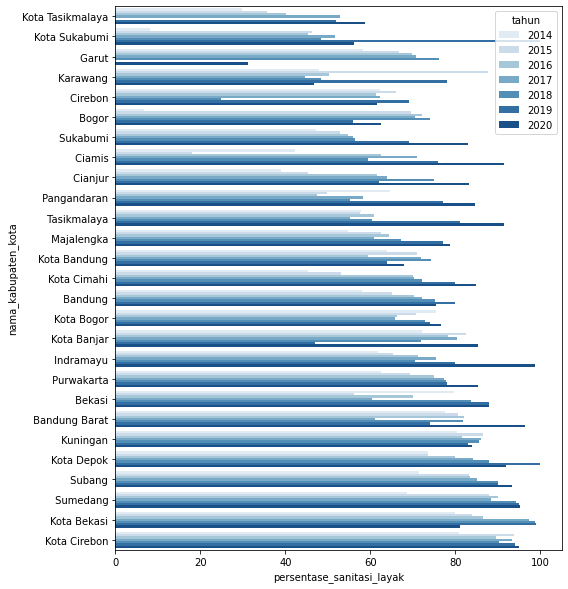

In [11]:
fig, ax = plt.subplots(figsize=(8, 10))
sns.barplot(
            data=sanitasi, 
            x="persentase_sanitasi_layak", 
            y="nama_kabupaten_kota", 
            hue="tahun",
            palette="Blues",
            ax=ax,
            order=urutan_kota_sanitasi,
            )

plt.show()

### Data Stunting

In [12]:
#importing and renaming the column to be consistent with ASI dataset
stunting_raw = pd.read_csv('/work/indeks_stunting/dpmdes-idm_jml_anak_stunting_mendapat_kunjungan__des_kel_data.csv',
            names=[
                'kode_provinsi', 'nama_provinsi', 'kode_kabupaten_kota',
                'nama_kabupaten_kota', 'kode_kecamatan', 'nama_kecamatan',
                'kode_desa_kelurahan', 'nama_desa_kelurahan',
                'kemendagri_kode_kecamatan', 'kemendagri_nama_kecamatan',
                'kemendagri_kode_desa_kelurahan', 'kemendagri_nama_desa_kelurahan',
                'jumlah_anak_stunting', 'satuan', 'tahun', 'id'],
            header=0
            )
stunting_raw

,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,kode_kecamatan,nama_kecamatan,kode_desa_kelurahan,nama_desa_kelurahan,kemendagri_kode_kecamatan,kemendagri_nama_kecamatan,kemendagri_kode_desa_kelurahan,kemendagri_nama_desa_kelurahan,jumlah_anak_stunting,satuan,tahun,id
0,32.0,JAWA BARAT,3201.0,KABUPATEN BOGOR,3201190.0,GUNUNG PUTRI,3.201190e+09,WANAHERANG,32.01.02,GUNUNG PUTRI,32.01.02.2001,WANAHERANG,24.0,ANAK,2019.0,1
1,32.0,JAWA BARAT,3201.0,KABUPATEN BOGOR,3201190.0,GUNUNG PUTRI,3.201190e+09,BOJONG KULUR,32.01.02,GUNUNG PUTRI,32.01.02.2002,BOJONG KULUR,5.0,ANAK,2019.0,2
2,32.0,JAWA BARAT,3201.0,KABUPATEN BOGOR,3201190.0,GUNUNG PUTRI,3.201190e+09,CIANGSANA,32.01.02,GUNUNG PUTRI,32.01.02.2003,CIANGSANA,12.0,ANAK,2019.0,3
3,32.0,JAWA BARAT,3201.0,KABUPATEN BOGOR,3201190.0,GUNUNG PUTRI,3.201190e+09,GUNUNG PUTRI,32.01.02,GUNUNG PUTRI,32.01.02.2004,GUNUNG PUTRI,0.0,ANAK,2019.0,4
4,32.0,JAWA BARAT,3201.0,KABUPATEN BOGOR,3201190.0,GUNUNG PUTRI,3.201190e+09,BOJONG NANGKA,32.01.02,GUNUNG PUTRI,32.01.02.2005,BOJONG NANGKA,0.0,ANAK,2019.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15931,32.0,JAWA BARAT,3279.0,KOTA BANJAR,3279020.0,PURWAHARJA,3.279020e+09,MEKARHARJA,32.79.03,PURWAHARJA,32.79.03.2003,MEKARHARJA,17.0,ANAK,2021.0,15932
15932,32.0,JAWA BARAT,3279.0,KOTA BANJAR,3279040.0,LANGENSARI,3.279040e+09,LANGENSARI,32.79.04,LANGENSARI,32.79.04.2001,LANGENSARI,0.0,ANAK,2021.0,15933
15933,32.0,JAWA BARAT,3279.0,KOTA BANJAR,3279040.0,LANGENSARI,3.279040e+09,REJASARI,32.79.04,LANGENSARI,32.79.04.2002,REJASARI,0.0,ANAK,2021.0,15934
15934,32.0,JAWA BARAT,3279.0,KOTA BANJAR,3279040.0,LANGENSARI,3.279040e+09,WARINGINSARI,32.79.04,LANGENSARI,32.79.04.2003,WARINGINSARI,0.0,ANAK,2021.0,15935


In [13]:
stunting_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15936 entries, 0 to 15935
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   kode_provinsi                   15936 non-null  float64
 1   nama_provinsi                   15936 non-null  object 
 2   kode_kabupaten_kota             15936 non-null  float64
 3   nama_kabupaten_kota             15936 non-null  object 
 4   kode_kecamatan                  15936 non-null  float64
 5   nama_kecamatan                  15936 non-null  object 
 6   kode_desa_kelurahan             15936 non-null  float64
 7   nama_desa_kelurahan             15936 non-null  object 
 8   kemendagri_kode_kecamatan       15936 non-null  object 
 9   kemendagri_nama_kecamatan       15936 non-null  object 
 10  kemendagri_kode_desa_kelurahan  15936 non-null  object 
 11  kemendagri_nama_desa_kelurahan  15936 non-null  object 
 12  jumlah_anak_stunting            

In [14]:
#include only relevant features
stunting = stunting_raw [['kode_kabupaten_kota','nama_kabupaten_kota', 'nama_desa_kelurahan','jumlah_anak_stunting', 'tahun']]
stunting

,kode_kabupaten_kota,nama_kabupaten_kota,nama_desa_kelurahan,jumlah_anak_stunting,tahun
0,3201.0,KABUPATEN BOGOR,WANAHERANG,24.0,2019.0
1,3201.0,KABUPATEN BOGOR,BOJONG KULUR,5.0,2019.0
2,3201.0,KABUPATEN BOGOR,CIANGSANA,12.0,2019.0
3,3201.0,KABUPATEN BOGOR,GUNUNG PUTRI,0.0,2019.0
4,3201.0,KABUPATEN BOGOR,BOJONG NANGKA,0.0,2019.0
...,...,...,...,...,...
15931,3279.0,KOTA BANJAR,MEKARHARJA,17.0,2021.0
15932,3279.0,KOTA BANJAR,LANGENSARI,0.0,2021.0
15933,3279.0,KOTA BANJAR,REJASARI,0.0,2021.0
15934,3279.0,KOTA BANJAR,WARINGINSARI,0.0,2021.0


In [15]:
#groupping by the Kabupaten
stunting = stunting.groupby(['nama_kabupaten_kota','kode_kabupaten_kota', 'tahun'])['jumlah_anak_stunting'].sum().reset_index()
stunting



,nama_kabupaten_kota,kode_kabupaten_kota,tahun,jumlah_anak_stunting
0,KABUPATEN BANDUNG,3204.0,2019.0,1579.0
1,KABUPATEN BANDUNG,3204.0,2020.0,2084.0
2,KABUPATEN BANDUNG,3204.0,2021.0,2080.0
3,KABUPATEN BANDUNG BARAT,3217.0,2019.0,337.0
4,KABUPATEN BANDUNG BARAT,3217.0,2020.0,388.0
5,KABUPATEN BANDUNG BARAT,3217.0,2021.0,444.0
6,KABUPATEN BEKASI,3216.0,2019.0,289.0
7,KABUPATEN BEKASI,3216.0,2020.0,1145.0
8,KABUPATEN BEKASI,3216.0,2021.0,1041.0
9,KABUPATEN BOGOR,3201.0,2019.0,1107.0


In [16]:
stunting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   nama_kabupaten_kota   57 non-null     object 
 1   kode_kabupaten_kota   57 non-null     float64
 2   tahun                 57 non-null     float64
 3   jumlah_anak_stunting  57 non-null     float64
dtypes: float64(3), object(1)
memory usage: 1.9+ KB


In [17]:
#dropping KABUPATEN
stunting['nama_kabupaten_kota'] = stunting['nama_kabupaten_kota'].str.replace('KABUPATEN', '')
stunting

,nama_kabupaten_kota,kode_kabupaten_kota,tahun,jumlah_anak_stunting
0,BANDUNG,3204.0,2019.0,1579.0
1,BANDUNG,3204.0,2020.0,2084.0
2,BANDUNG,3204.0,2021.0,2080.0
3,BANDUNG BARAT,3217.0,2019.0,337.0
4,BANDUNG BARAT,3217.0,2020.0,388.0
5,BANDUNG BARAT,3217.0,2021.0,444.0
6,BEKASI,3216.0,2019.0,289.0
7,BEKASI,3216.0,2020.0,1145.0
8,BEKASI,3216.0,2021.0,1041.0
9,BOGOR,3201.0,2019.0,1107.0


In [18]:
_deepnote_run_altair(stunting, """{"data":{"name":"placeholder"},"mark":{"type":"bar","tooltip":true},"height":220,"$schema":"https://vega.github.io/schema/vega-lite/v4.json","autosize":{"type":"fit"},"encoding":{"x":{"sort":null,"type":"quantitative","field":"jumlah_anak_stunting","scale":{"type":"linear","zero":false}},"y":{"sort":{"order":"ascending","encoding":"x"},"type":"nominal","field":"nama_kabupaten_kota","scale":{"type":"linear","zero":true}},"color":{"sort":null,"type":"nominal","field":"tahun","scale":{"type":"linear","zero":false}}}}""")

alt.Chart(...)

In [19]:
#buat list urutan kota dari rendah-tinggi jumlah anak stunting total
urutan_kota_stunting = stunting.groupby('nama_kabupaten_kota')['jumlah_anak_stunting'].sum().sort_values().keys().to_list()
urutan_kota_stunting

['KOTA BANJAR',
 ' PANGANDARAN',
 ' INDRAMAYU',
 ' BANDUNG BARAT',
 ' KARAWANG',
 ' KUNINGAN',
 ' MAJALENGKA',
 ' CIANJUR',
 ' BEKASI',
 ' CIAMIS',
 ' PURWAKARTA',
 ' SUMEDANG',
 ' SUBANG',
 ' BOGOR',
 ' GARUT',
 ' CIREBON',
 ' TASIKMALAYA',
 ' BANDUNG',
 ' SUKABUMI']

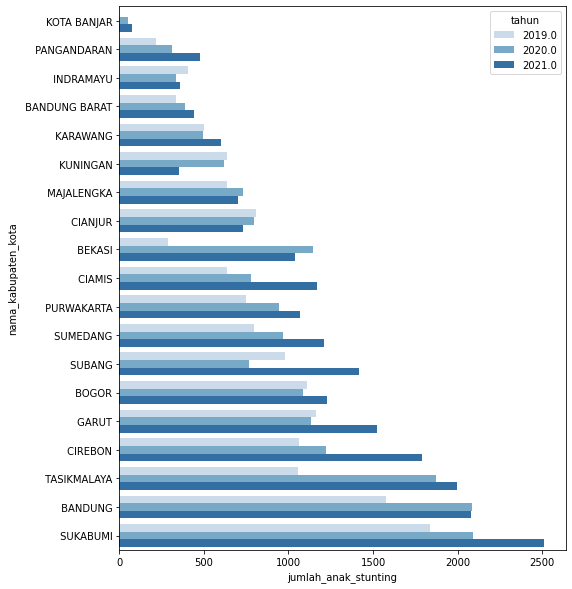

In [20]:
fig, ax = plt.subplots(figsize=(8, 10))
sns.barplot(
            data=stunting, 
            x="jumlah_anak_stunting", 
            y="nama_kabupaten_kota", 
            hue="tahun", 
            palette="Blues",
            ax=ax,
            order = urutan_kota_stunting
            )

plt.show()

### Comparison 

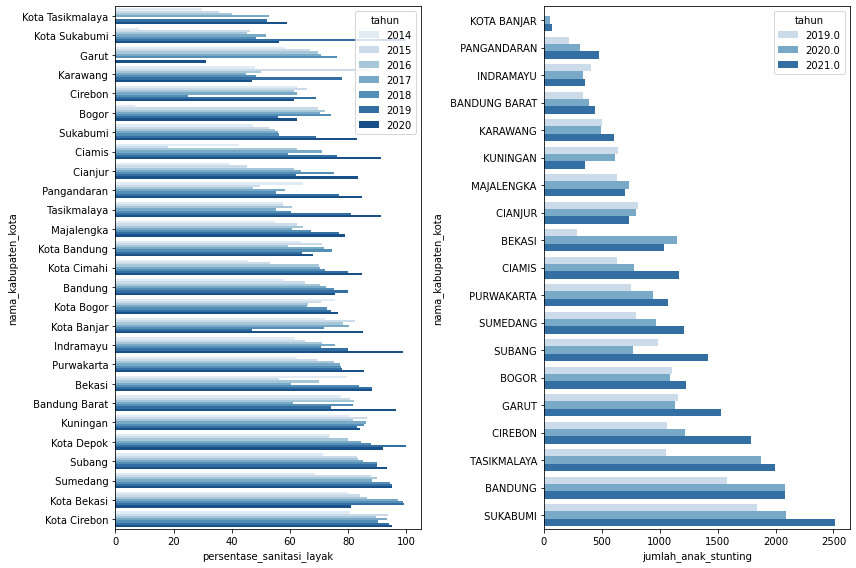

In [21]:
# setting up the canvas and fig size
fig, ax = plt.subplots(1,2, figsize=(12, 8))

#ASI
sns.barplot(
            data=sanitasi, 
            x="persentase_sanitasi_layak", 
            y="nama_kabupaten_kota", 
            hue="tahun",
            palette="Blues",
            ax=ax[0],
            order=urutan_kota_sanitasi,
            )

#stunting
sns.barplot(
            data=stunting, 
            x="jumlah_anak_stunting", 
            y="nama_kabupaten_kota", 
            hue="tahun", 
            palette="Blues",
            ax=ax[1],
            order = urutan_kota_stunting,
            )

plt.tight_layout()

plt.show()

- Analysis: [work in progress]

### Combining ASI and Stunting Index dataset

In [22]:
stunting.columns

Index(['nama_kabupaten_kota', 'kode_kabupaten_kota', 'tahun',
       'jumlah_anak_stunting'],
      dtype='object')

In [23]:
sanitasi.columns


Index(['kode_kabupaten_kota', 'nama_kabupaten_kota',
       'persentase_sanitasi_layak', 'tahun'],
      dtype='object')

In [24]:
#merging asi and stunting data via kabupaten
sanitasi_stunting = sanitasi.merge(stunting[[
                    'kode_kabupaten_kota', 'jumlah_anak_stunting']], on = 'kode_kabupaten_kota', how = 'left')

sanitasi_stunting

,kode_kabupaten_kota,nama_kabupaten_kota,persentase_sanitasi_layak,tahun,jumlah_anak_stunting
0,3201,Bogor,6.85,2014,1107.0
1,3201,Bogor,6.85,2014,1086.0
2,3201,Bogor,6.85,2014,1226.0
3,3202,Sukabumi,47.29,2014,1838.0
4,3202,Sukabumi,47.29,2014,2093.0
...,...,...,...,...,...
450,3277,Kota Cimahi,84.90,2020,NaN
451,3278,Kota Tasikmalaya,58.80,2020,NaN
452,3279,Kota Banjar,85.20,2020,1.0
453,3279,Kota Banjar,85.20,2020,50.0


In [25]:
_deepnote_run_altair(sanitasi_stunting, """{"data":{"name":"placeholder"},"mark":{"type":"bar","tooltip":true},"height":220,"$schema":"https://vega.github.io/schema/vega-lite/v4.json","autosize":{"type":"fit"},"encoding":{"x":{"sort":null,"type":"quantitative","field":"kode_kabupaten_kota","scale":{"type":"linear","zero":false}},"y":{"sort":null,"type":"nominal","field":"nama_kabupaten_kota","scale":{"type":"linear","zero":true}},"color":{"sort":null,"type":"nominal","field":"","scale":{"type":"linear","zero":false}}}}""")

alt.Chart(...)

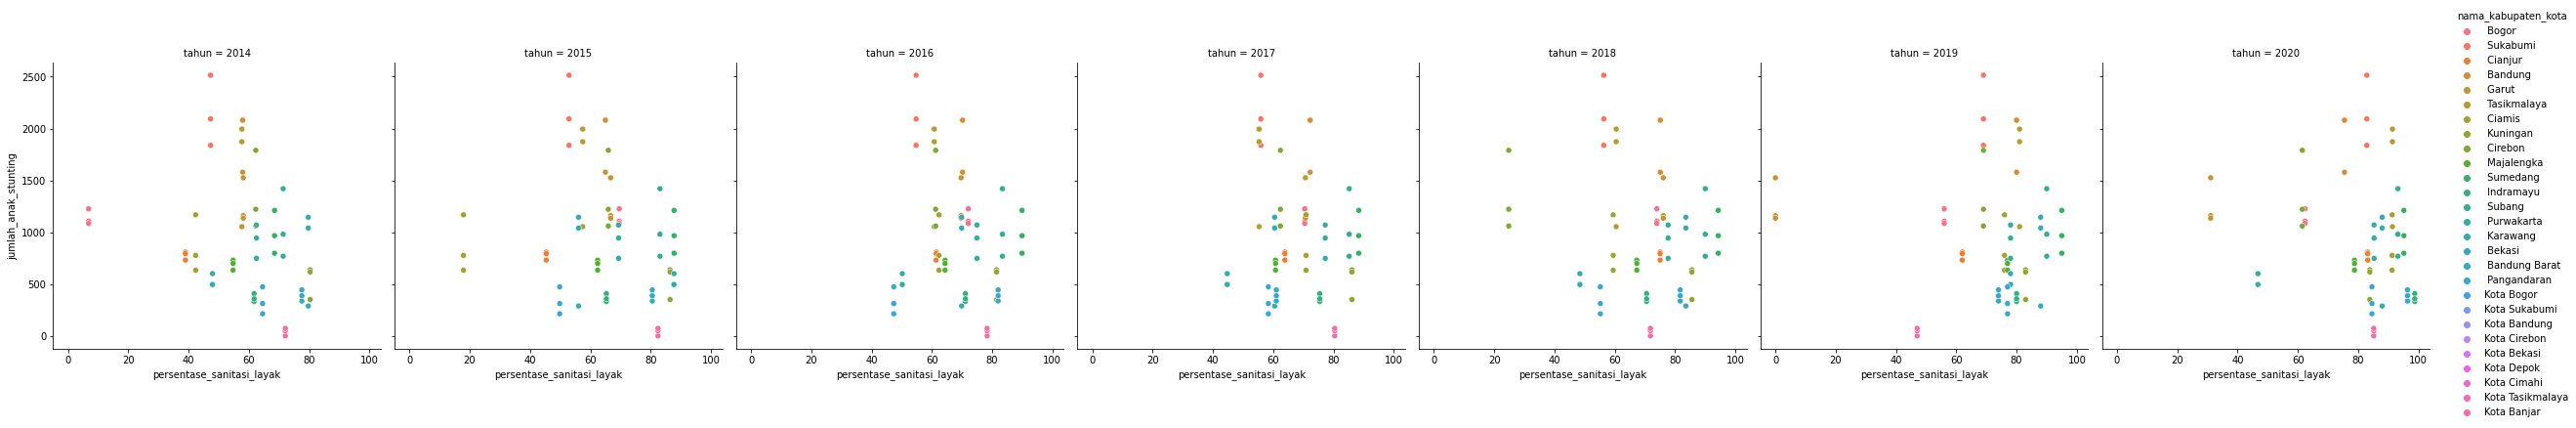

In [26]:
#checking if any relationship between number of stunting vs sanitasi percentage

sns.relplot(data=sanitasi_stunting, 
            x='persentase_sanitasi_layak', 
            y='jumlah_anak_stunting', 
            col = 'tahun',
            hue = 'nama_kabupaten_kota', 
            )

plt.show()

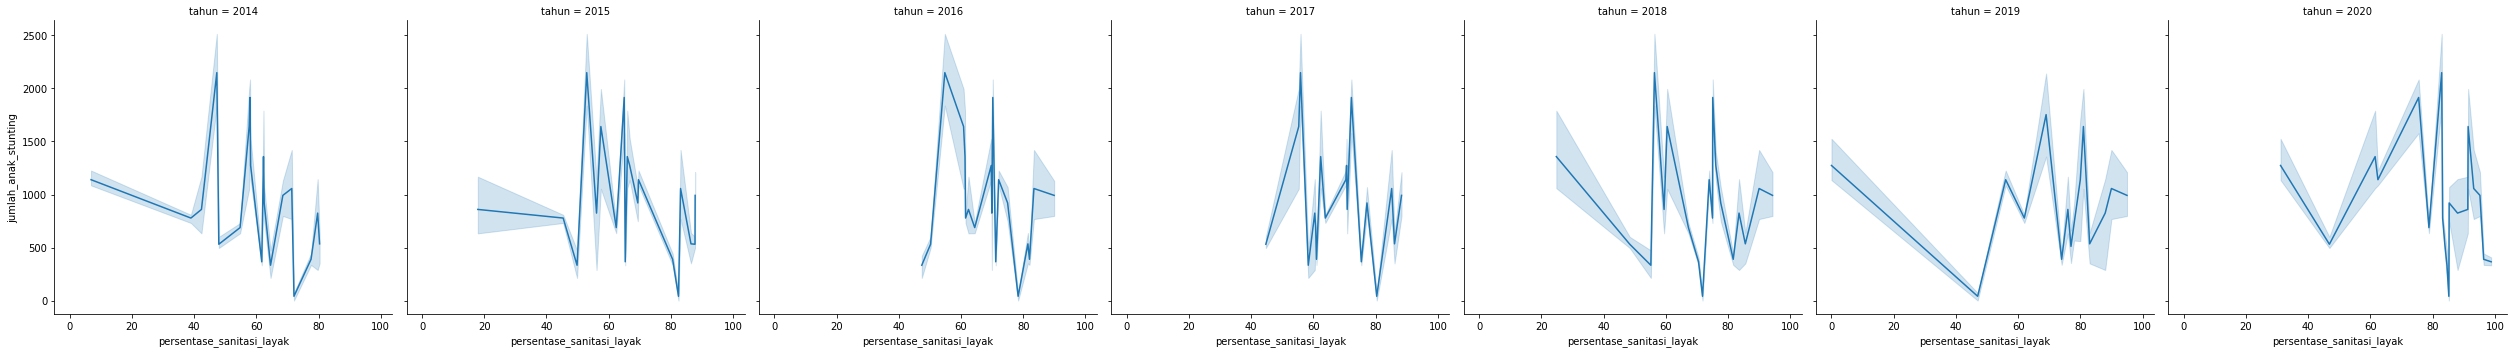

In [27]:
#checking if any relationship between number of stunting vs sanitasi percentage
sns.relplot(
            data=sanitasi_stunting, 
            x='persentase_sanitasi_layak', 
            y='jumlah_anak_stunting', 
            col = 'tahun', 
            # style='nama_kabupaten_kota', 
            kind='line'
            
            );

- Analysis: [work in progress]

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a3c63e67-900c-413f-8baa-baa795b5d686' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>